<a href="https://colab.research.google.com/github/srivatsalnarayan/car_vs_bike/blob/main/with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [3]:

data = '/content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [5]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Car/Car (2).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Car/Car (15).JPG
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (70).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (90).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (95).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (113).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (114).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (132).jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (136).jpg
Image not in ext lis

In [6]:
df = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset')


Found 3981 files belonging to 2 classes.


In [7]:
df_iterator = df.as_numpy_iterator()


In [8]:

batch = df_iterator.next()


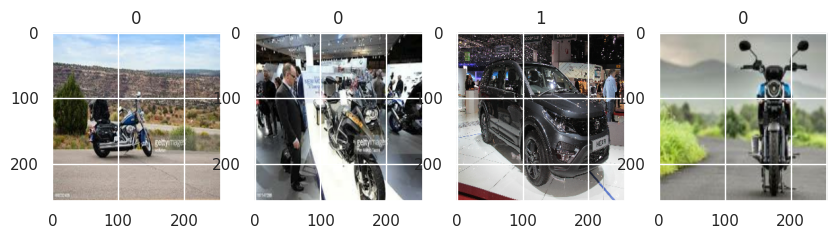

In [9]:

fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:

df = df.map(lambda x,y: (x/255, y))
df.as_numpy_iterator().next()
     

(array([[[[0.99215686, 0.94509804, 0.8980392 ],
          [0.99148285, 0.94442403, 0.8973652 ],
          [0.9884191 , 0.9413603 , 0.8943015 ],
          ...,
          [0.7861213 , 0.68416053, 0.59396446],
          [0.8489277 , 0.7469669 , 0.6567708 ],
          [0.8627451 , 0.7607843 , 0.67058825]],
 
         [[0.98710173, 0.9400429 , 0.8929841 ],
          [0.9865725 , 0.9395137 , 0.89245486],
          [0.984167  , 0.93710816, 0.89004934],
          ...,
          [0.7865215 , 0.6845607 , 0.59436464],
          [0.8503811 , 0.74842024, 0.65822417],
          [0.8644301 , 0.76246935, 0.6722733 ]],
 
         [[0.9641238 , 0.91706496, 0.87000614],
          [0.96425277, 0.91719395, 0.8701351 ],
          [0.9648392 , 0.9177804 , 0.8707216 ],
          ...,
          [0.7883406 , 0.68637985, 0.5961837 ],
          [0.85698724, 0.7550264 , 0.6648303 ],
          [0.87208945, 0.77012867, 0.6799326 ]],
 
         ...,
 
         [[0.7018995 , 0.56464463, 0.4783701 ],
          [0.70872

In [11]:
train_size = int(len(df)*.6)
val_size = int(len(df)*.2)
test_size = int(len(df)*.2)
     

In [12]:

train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(train_size+val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
     


In [14]:
model = Sequential()


In [15]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
     

Epoch 1/10
75/75 [==============================] - 229s 3s/step - loss: 0.6796 - accuracy: 0.6392 - val_loss: 0.5200 - val_accuracy: 0.7487
Epoch 2/10
75/75 [==============================] - 235s 3s/step - loss: 0.3544 - accuracy: 0.8467 - val_loss: 0.2798 - val_accuracy: 0.8813
Epoch 3/10
75/75 [==============================] - 218s 3s/step - loss: 0.2272 - accuracy: 0.9038 - val_loss: 0.2612 - val_accuracy: 0.9000
Epoch 4/10
75/75 [==============================] - 229s 3s/step - loss: 0.1429 - accuracy: 0.9521 - val_loss: 0.2116 - val_accuracy: 0.9250
Epoch 5/10
75/75 [==============================] - 216s 3s/step - loss: 0.0870 - accuracy: 0.9667 - val_loss: 0.2397 - val_accuracy: 0.9087
Epoch 6/10
75/75 [==============================] - 224s 3s/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 0.2348 - val_accuracy: 0.9162
Epoch 7/10
75/75 [==============================] - 224s 3s/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.2396 - val_accuracy: 0.9187
Epoch 8/10
75

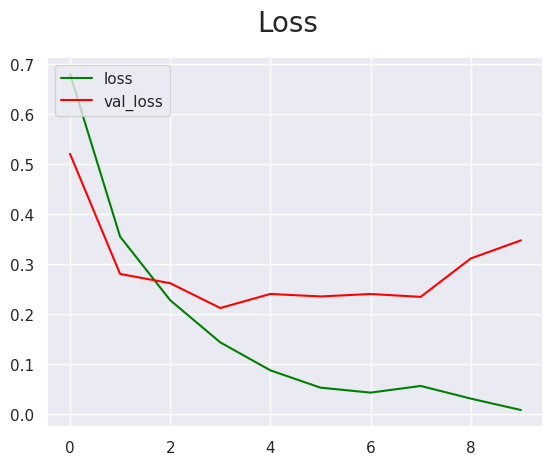

In [19]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
     

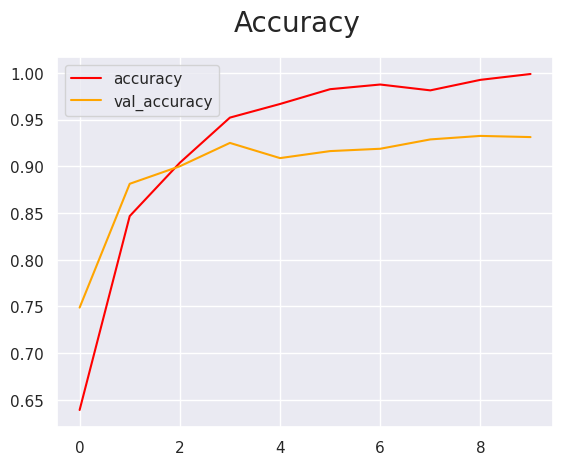

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [22]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)  

1/1 [==============================] - 0s 320ms/step


In [23]:
print(precision.result(), recall.result(), accuracy.result())


tf.Tensor(0.9362745, shape=(), dtype=float32) tf.Tensor(0.96464646, shape=(), dtype=float32) tf.Tensor(0.94878364, shape=(), dtype=float32)


In [24]:
print(precision.result(), recall.result(), accuracy.result())


tf.Tensor(0.9362745, shape=(), dtype=float32) tf.Tensor(0.96464646, shape=(), dtype=float32) tf.Tensor(0.94878364, shape=(), dtype=float32)


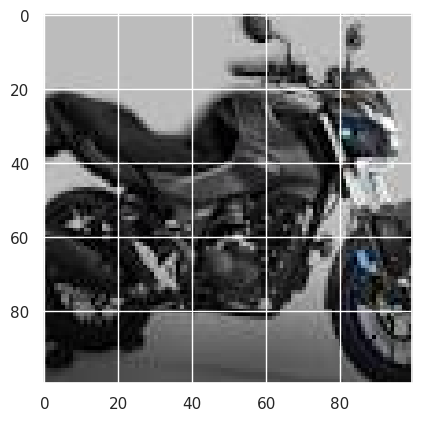

In [28]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/car_vs_bike/Car-Bike-Dataset/Bike/Bike (1).jpeg')
plt.imshow(img)
plt.show()

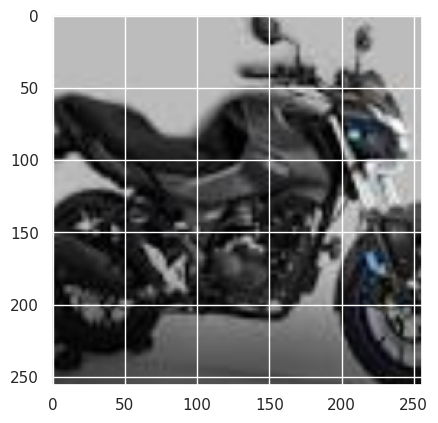

In [29]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
classify = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 89ms/step


In [31]:
classify


array([[3.7070058e-06]], dtype=float32)

In [32]:

if classify > 0.5: 
    print(f'Car')
else:
    print(f'Bike')

Bike


In [33]:
print(accuracy.result())

tf.Tensor(0.94878364, shape=(), dtype=float32)
